In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Import cleaned data
df = pd.read_csv('../data/telco_churn_cleaned.csv')

# Separate features from the target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 80% will be used as training data, 20% will be used to test the model afterwards
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [136]:
# Train XGBoost model and show predction results
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Create and train the model
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

XGBoost Accuracy: 0.7974413646055437
Confusion Matrix:
 [[925 108]
 [177 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC: 0.8377409134911555


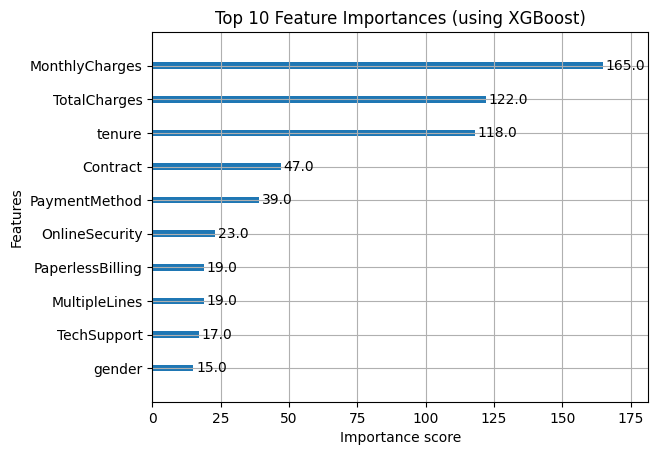

In [137]:
# Display plot to visualize the most important features
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances (using XGBoost)")
plt.show()

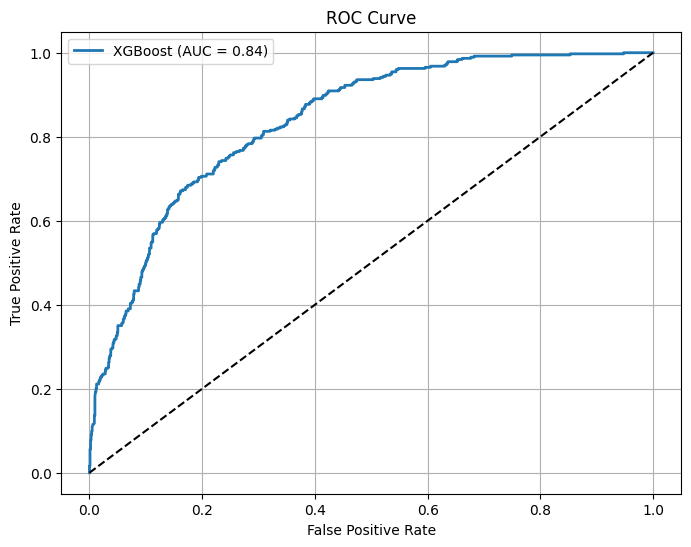

In [ ]:
# Show ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal dotted line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

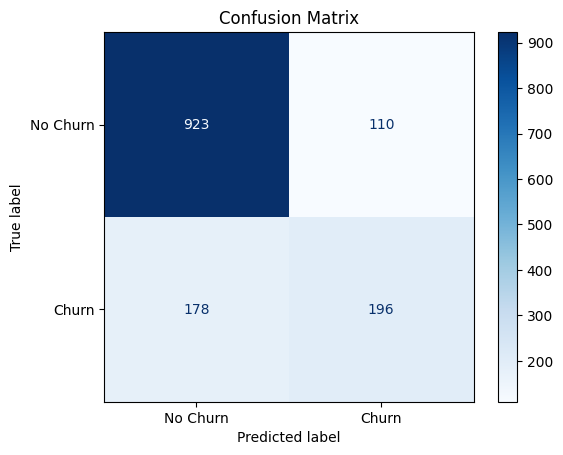

In [ ]:
# Show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binary predictions
y_pred = xgb_model.predict(X_test)

# Initialize and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [138]:
# Save model
import pickle

with open('../models/xgb_churn_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)